In [1]:
%matplotlib notebook

from rlsm.datasets.synthetic import generate_data
from rlsm import ReciprocityLSM

In [2]:
Y, params = generate_data(n_nodes=100, density=0.25, mu=1, random_state=2)

Z = params['Z']
print(params['recip_coef'], params['dist_coef'])

-0.4446938548250201 -0.6997442072802071


In [3]:
from sklearn.metrics import roc_auc_score
from rlsm.network_utils import adjacency_to_vec

roc_auc_score(adjacency_to_vec(Y), params['probas'])

0.8264712929225894

<IPython.core.display.Javascript object>


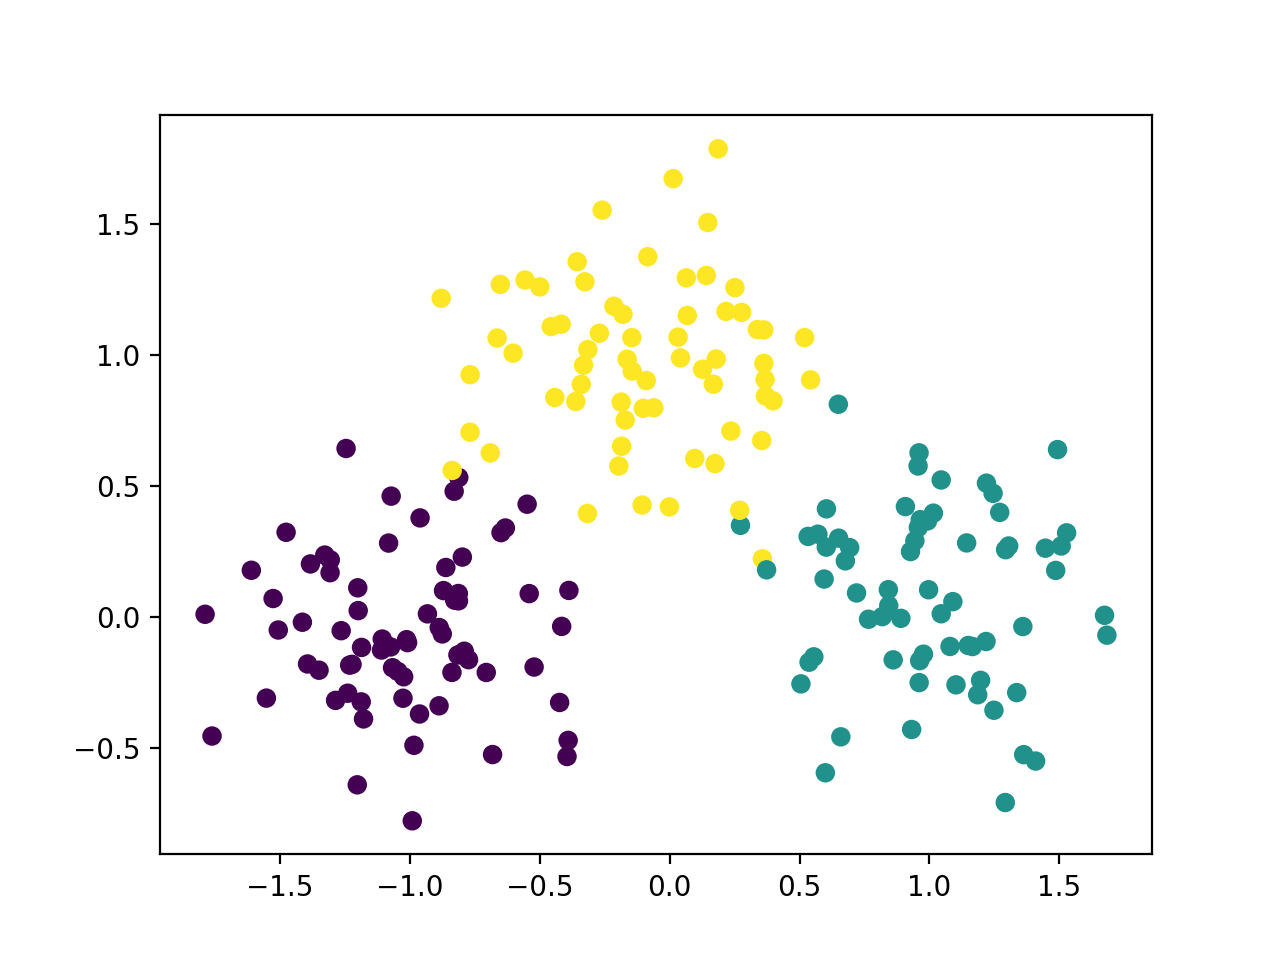

In [4]:
plt.scatter(Z[:, 0], Z[:, 1],c=params['c'])

<IPython.core.display.Javascript object>


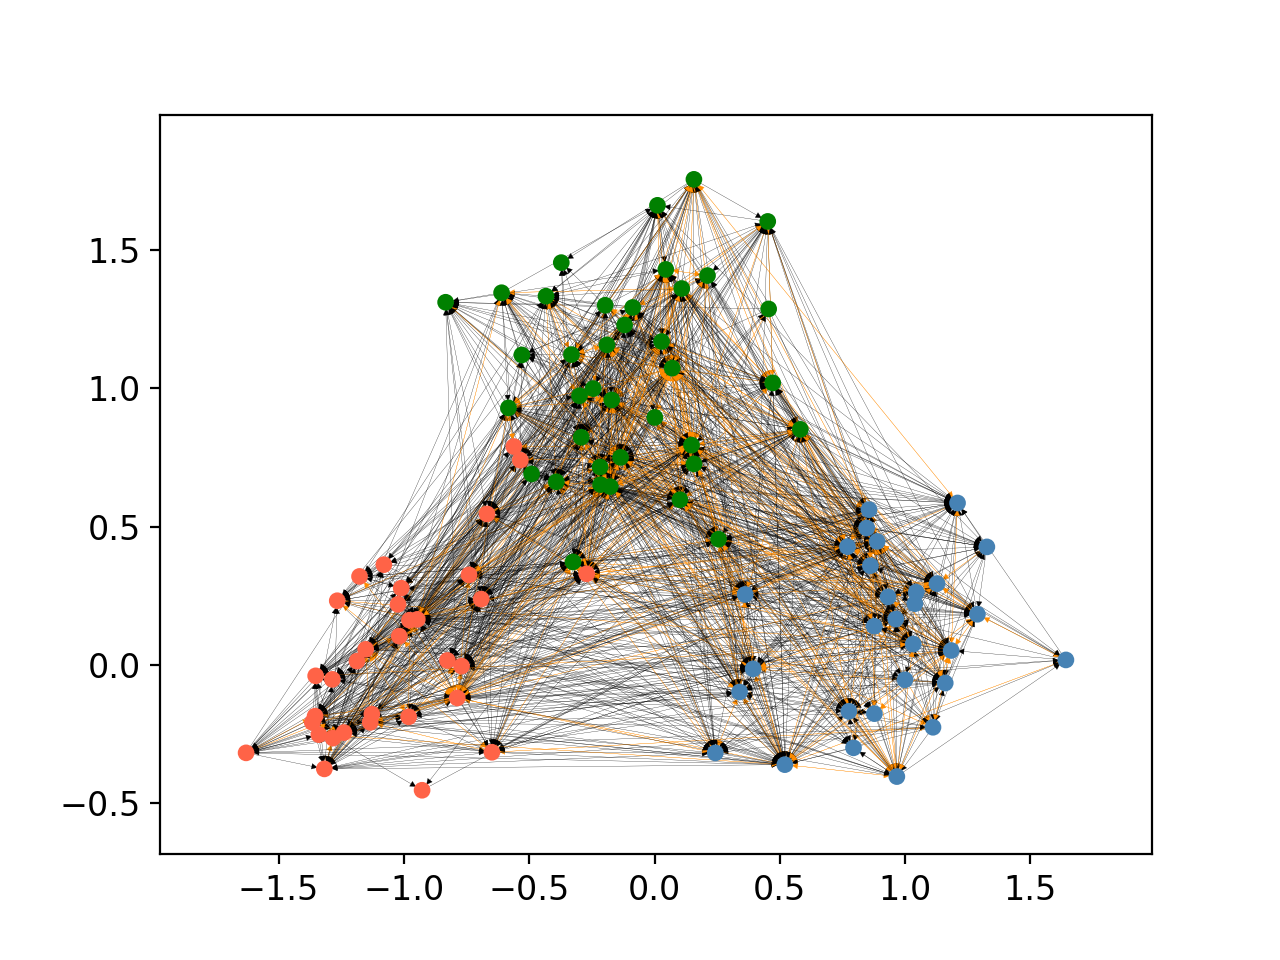

In [11]:
import networkx as nx

colors = np.asarray(["tomato", "steelblue", "green"])
#colors = np.asarray(["red", "cyan", "purple", "yellow","pink", 'orange'])
g = nx.from_numpy_array(Y, create_using=nx.DiGraph)
elist = list(nx.to_edgelist(g))
ecolor = ['darkorange' if Y[e[1], e[0]] else 'black' for e in elist]
pos = {k : Z[k] for k in range(Y.shape[0])}
nx.draw_networkx(g, pos, 
                 arrowsize=5,
                 node_color=colors[params['c']],
                 edge_color=ecolor, width=0.1, with_labels=False,
                 node_size=25)
plt.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True,
                labelsize=12)

In [4]:
model = ReciprocityLSM(n_features=2, reciprocity_type='distance', random_state=42)
model.sample(Y, n_warmup=2000, n_samples=2000)

sample: 100%|█████████████████████████████████████████████████████████████████| 4000/4000 [00:53<00:00, 74.61it/s, 63 steps of size 7.56e-02. acc. prob=0.84]


In [5]:
model.print_summary()

AUC: 0.846, WAIC: 8637.375

                  mean       std    median      2.5%     97.5%     n_eff     r_hat
  recip_coef     -0.55      0.25     -0.55     -1.01     -0.08    716.85      1.00
   dist_coef     -0.47      0.22     -0.47     -0.90     -0.07    824.40      1.00
       s_var      1.09      0.18      1.08      0.73      1.44    507.62      1.00
       r_var      1.20      0.20      1.19      0.84      1.61    530.85      1.00
     sr_corr      0.57      0.08      0.58      0.41      0.72    424.06      1.00

Number of divergences: 13


In [6]:
print(params['recip_coef'], params['dist_coef'])

-0.4446938548250201 -0.6997442072802071


<IPython.core.display.Javascript object>


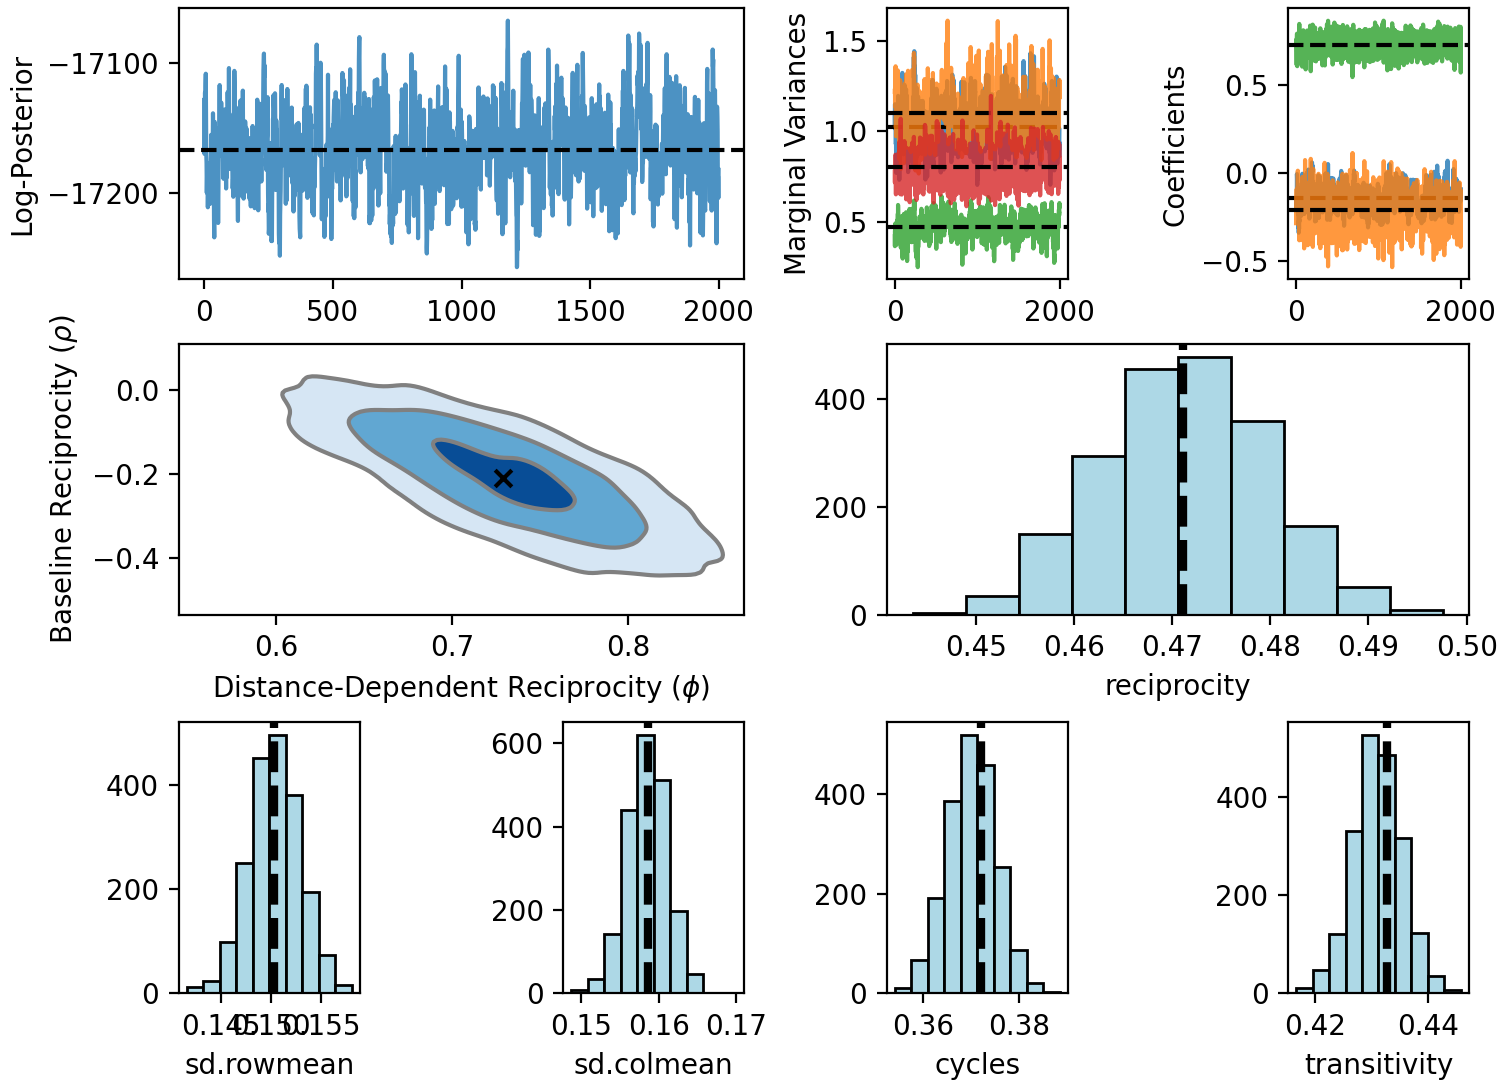

{'A': <Axes: label='A', ylabel='Log-Posterior'>,
 'B': <Axes: label='B', ylabel='Marginal Variances'>,
 'C': <Axes: label='C', ylabel='Coefficients'>,
 'D': <Axes: label='D', xlabel='Distance-Dependent Reciprocity ($\\phi$)', ylabel='Baseline Reciprocity ($\\rho$)'>,
 'E': <Axes: label='E', xlabel='reciprocity'>,
 'F': <Axes: label='F', xlabel='sd.rowmean'>,
 'G': <Axes: label='G', xlabel='sd.colmean'>,
 'H': <Axes: label='H', xlabel='cycles'>,
 'I': <Axes: label='I', xlabel='transitivity'>}

In [49]:
model.plot()

0.39796209330297366
0.511154835733179


<IPython.core.display.Javascript object>


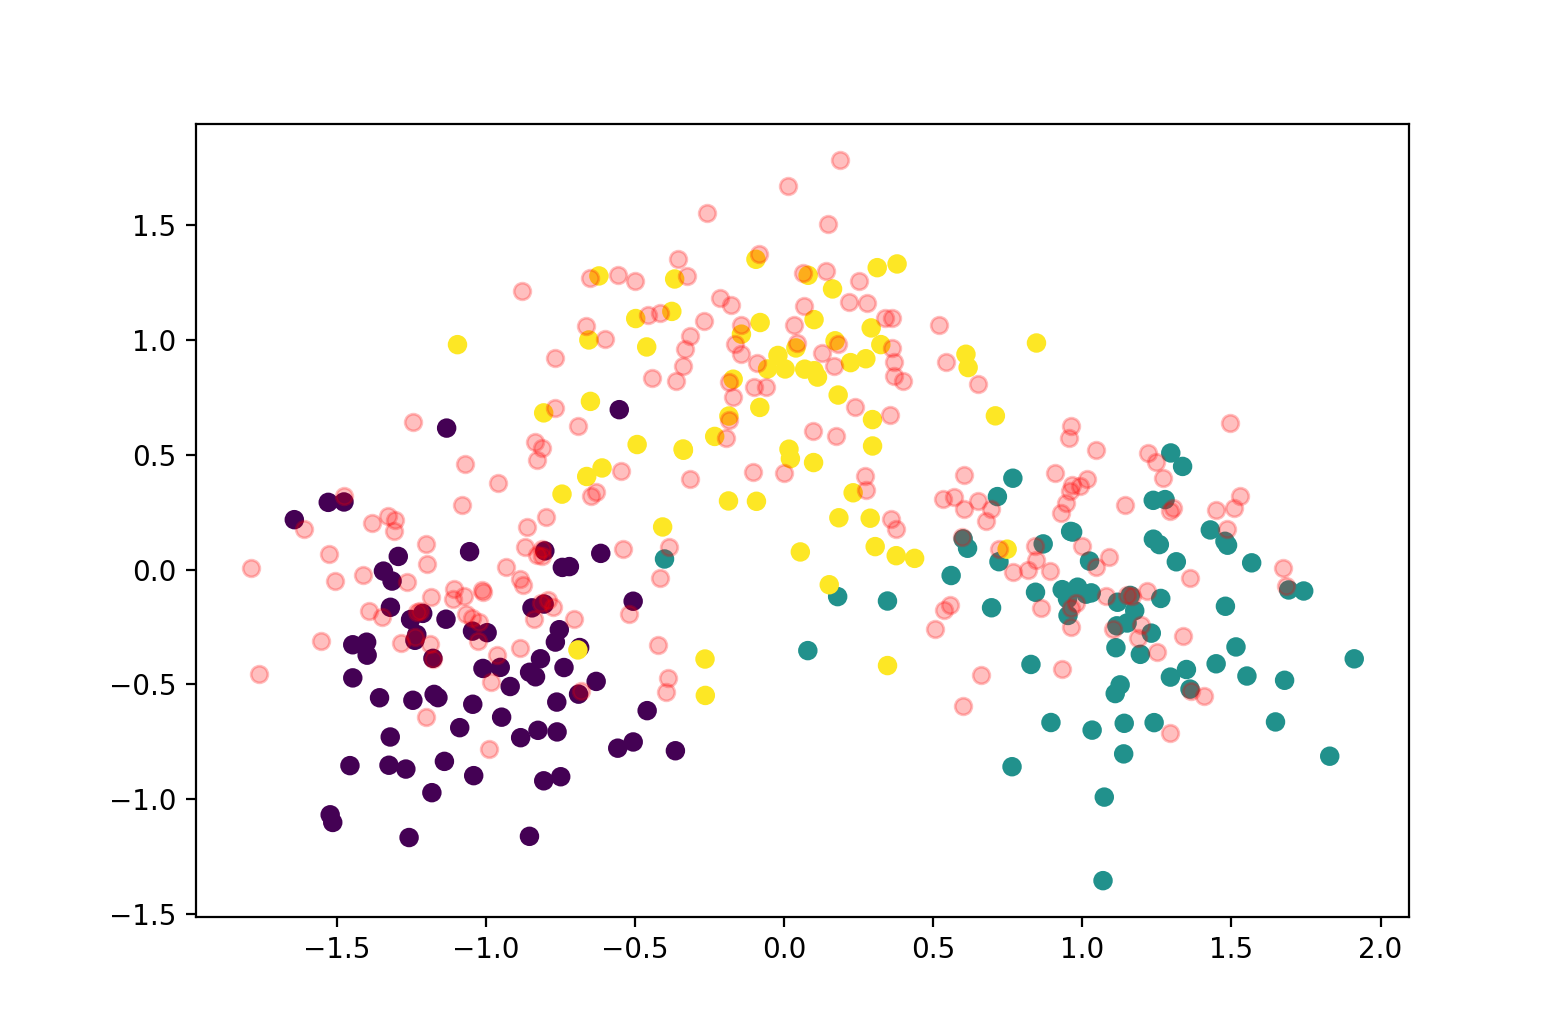

In [50]:
from scipy.linalg import orthogonal_procrustes

z = params['c']
R, _ = orthogonal_procrustes(model.Z_, Z)
U_est = model.Z_ @ R
print(np.sqrt(np.mean((U_est - Z) ** 2)))
print(np.sqrt(np.sum((U_est - Z) ** 2)) / np.sqrt(np.sum(Z **2 )))

plt.scatter(U_est[:, 0], U_est[:, 1], c=z)
plt.scatter(Z[:, 0], Z[:,1], alpha=0.25, c='red')